In [682]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv

In [775]:
class LinearRegression:
    
    def __init__(self, X=None, Y=None):
        
        if X is None:
            raise TypeError("'X' expected as 2-dimensional array, found 'None' instead")
        else:
            temp = np.array(X)
            if temp.ndim == 1:
                raise TypeError("'X' is 1-dimensional array, not compatible with 2-dimension matrices")
            if temp.ndim > 2:
                raise TypeError("'X' cannot be more than 2-dimensional, please specify a 2d matrix")
            
            self.X = np.concatenate((np.ones((len(temp), 1)), temp), axis=1)
            
        if Y is None:
            raise TypeError("'Y' expected as 1-dimensional array, found 'None' instead")
        else:
            temp = np.array(Y)
            if temp.ndim > 2:
                raise TypeError("'Y' cannot be more than 2-dimensional, please specify a 1d vector")
            if temp.ndim == 1:
                temp = temp.reshape((-1, 1))
            elif temp.shape[0] == 1:
                temp = temp.T
            elif not temp.shape[1] == 1:
                raise TypeError("'Y' has to be a 1d-array or a 2-dimensional vector along the row or column")
            
            self.Y = temp
            
            if not len(self.X) == len(self.Y):
                raise RuntimeError("Length of input records in 'X' %d do not match to number of length of output \
                        vector %d" % (self.X.shape[0],self.Y.shape[0]))
        
        self.features = self.X.shape[1]
        self.num = self.X.shape[0]
        
#         self.theta = np.zeros((self.features, 1))
        self.theta = np.random.rand(self.features, 1)
    
#         self.validate()
        
    def validate(self):
        print("Validating class")
        print(self.X)
        print(self.Y)
        print(self.theta)
        
    def H(self, rec):
        temp = np.array(rec)
        if temp.ndim == 1:
            temp = temp.reshape(1, -1)
            if not temp.shape[1] == self.features:
                raise RuntimeError("Input record size cannot be other than number features %d" % self.features)
            return np.dot(temp, self.theta)[0, 0]
    
    def J(self, ip=None, op=None, theta=None, use_data=False, use_theta=False, regularize=False, reg_lambda=0):
        
        if use_data:
            ip = self.X
            op = self.Y
            
        if use_theta:
            theta = self.theta
            
        if ip is None:
            raise TypeError("'ip' expected as 2-dimensional array, found 'None' instead")
            
        if op is None:
            raise TypeError("'op' expected as 1-dimensional vector, found 'None' instead")
            
        if theta is None:
            raise TypeError("'theta' expected as 1-dimensional vector, found 'None' instead")
        
        
        if not isinstance(ip, np.ndarray):
            ip = np.array(ip)
        
        if not ip.ndim == 2:
            raise TypeError("Cannot work with non 2-dimensional input arrays")
            
#         if not theta.ndim == 1:
#             raise TypeError("Cannot work with non 1-dimensional parameter array")
            
        if not ip.shape[1] == theta.shape[0]:
            raise RuntimeError("Number of feature columns do not match input columns")
            
#         if not op.ndim == 1:
#             raise TypeError("Cannot work with non 1-dimensional output array")
            
#         if not ip.shape[0] == op.shape[0]:
#             raise RuntimeError("Number of feature columns do not match input columns")
            
        
        m = ip.shape[0]
        
        temp = np.dot(ip, theta)
        temp = temp - self.Y

        j = (temp**2).sum()/ 2 / m
            
        if regularize:
            reg = reg_lambda * (theta**2).sum()
            return j + reg / 2 / m
        else:
            return j
    
    def gradient_descent(self, ip=None, op=None, theta=None, alpha=0, use_data=False, use_theta=False, 
                         regularize=False, reg_lambda=0):
        
        if use_data:
            ip = self.X
            op = self.Y
            
        if use_theta:
            theta = self.theta
            
        if ip is None:
            raise TypeError("'ip' expected as 2-dimensional array, found 'None' instead")
            
        if op is None:
            raise TypeError("'op' expected as 1-dimensional vector, found 'None' instead")
            
        if theta is None:
            raise TypeError("'theta' expected as 1-dimensional vector, found 'None' instead")
        
        
        if not isinstance(ip, np.ndarray):
            ip = np.array(ip)
        
        if not ip.ndim == 2:
            raise TypeError("Cannot work with non 2-dimensional input arrays")
            
#         if not theta.ndim == 1:
#             raise TypeError("Cannot work with non 1-dimensional parameter array")
            
        if not ip.shape[1] == theta.shape[0]:
            raise RuntimeError("Number of feature columns do not match input columns")
            
#         if not op.ndim == 1:
#             raise TypeError("Cannot work with non 1-dimensional output array")
            
#         if not ip.shape[0] == op.shape[0]:
#             raise RuntimeError("Number of feature columns do not match input columns")
            
        
        m = ip.shape[0]
        
        temp = np.dot(ip, self.theta)
        temp = temp - self.Y
        
        if regularize:
            return ((1 - alpha*reg_lambda/m) * theta) - (alpha * (ip.T.dot(temp)) / m)
        else:
            return theta - (alpha * (ip.T.dot(temp)) / m)
    
    def normal_theta(self, ip=None, op=None, use_data=False, regularize=False, reg_lambda=0):
        
        if use_data:
            ip = self.X
            op = self.Y
            
        if ip is None:
            raise TypeError("'ip' expected as 2-dimensional array, found 'None' instead")
            
        if op is None:
            raise TypeError("'op' expected as 1-dimensional vector, found 'None' instead")
        
        if not isinstance(ip, np.ndarray):
            ip = np.array(ip)
        
        if not ip.ndim == 2:
            raise TypeError("Cannot work with non 2-dimensional input arrays")
            
#         if not op.ndim == 1:
#             raise TypeError("Cannot work with non 1-dimensional output array")
            
#         if not ip.shape[0] == op.shape[0]:
#             raise RuntimeError("Number of feature columns do not match input columns")
        
        A = pinv(ip.T.dot(ip))
        n = ip.shape[1]
        i = np.eye(n)
        i[0][0] = 0
        
        B = A
        if regularize:
            B = B + reg_lambda*i
        return B.dot(ip.T).dot(op)
    

In [776]:
model = LinearRegression(X = [[1], [2], [3]], Y = [1, 2, 3])

In [777]:
t = model.normal_theta(use_data=True)
t

array([[ -8.88178420e-16],
       [  1.00000000e+00]])

In [778]:
model.J(use_data=True, theta=t)

3.944304526105059e-31

In [779]:
foo = []

In [780]:
foo.append(model.J(use_data=True, use_theta=True, regularize=True, reg_lambda=.00001))

In [781]:
print(model.theta)
for _ in range(1000):
    model.theta = model.gradient_descent(use_data=True, use_theta=True, alpha=.3, regularize=True, reg_lambda=.00001)
    foo.append(model.J(use_data=True, use_theta=True, regularize=True, reg_lambda=.00001))
model.theta

[[ 0.35155483]
 [ 0.52359256]]


array([[  9.99971668e-06],
       [  9.99995000e-01]])

In [782]:
model.J(use_data=True, use_theta=True)

8.3329166843473119e-12

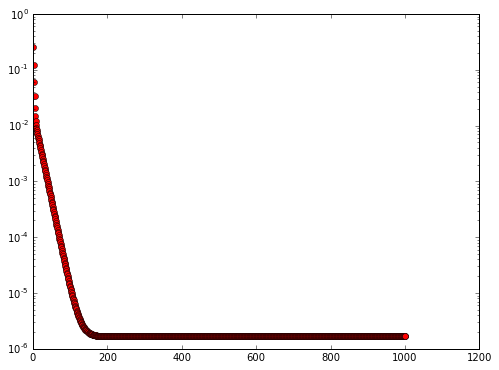

In [783]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(1, 1, 1)

sct = ax.plot(np.arange(1, 1+len(foo)), foo, 'ro')
ax.set_yscale('log')

plt.show()